## Lab 7

Kun Lee, partner: Lexie Peterson


In [40]:
#Setup
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import math
from scipy import stats

plt.rcParams["figure.figsize"] = (20,15)

d = stats.norm.rvs(loc = 5., scale = 0.01, size = 100000)
plt.rcParams["figure.figsize"] = (50,50)

import pickle
infile = open("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(infile)
qcd.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [3]:
infile = open("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(infile)
higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

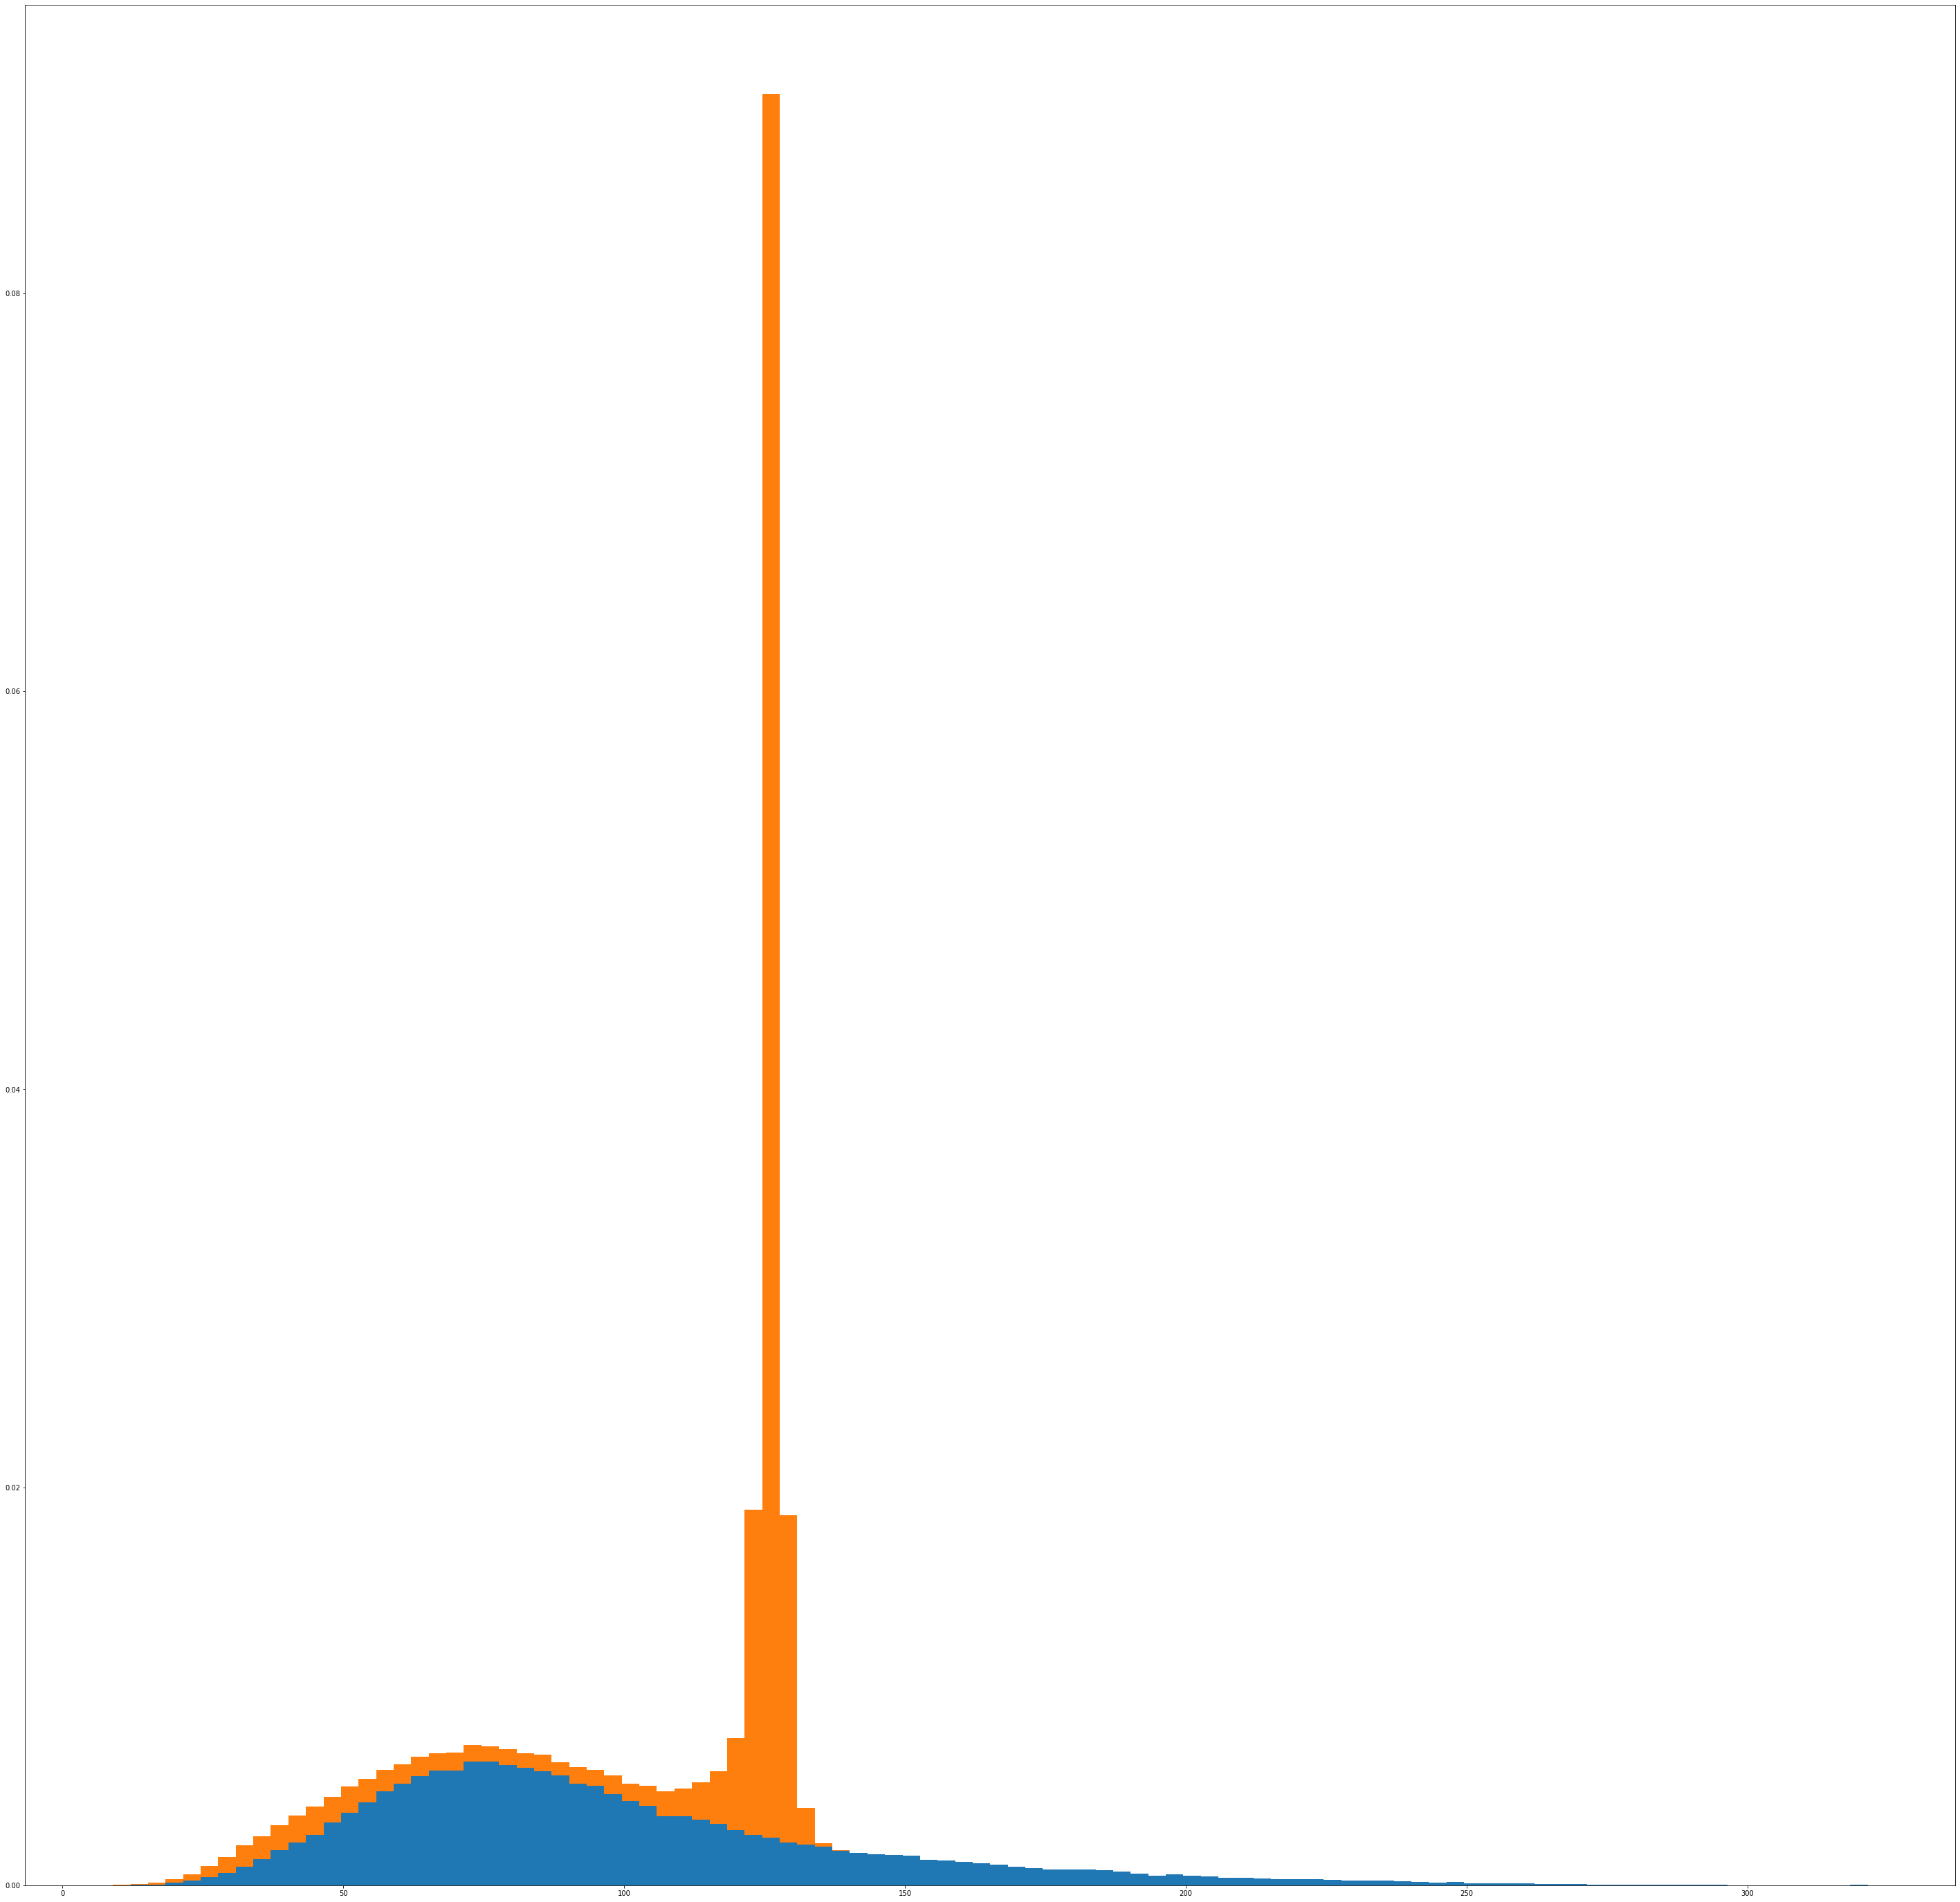

In [17]:
fig, ax = plt.subplots(1,1)
list = [qcd["mass"], higgs["mass"]]
ax.hist(list, stacked=True, bins=100, density=True)
plt.show()

In [58]:
higgs_mean = np.mean(higgs["mass"])
qcd_mean = np.mean(qcd["mass"])
scipy.stats.norm.isf(scipy.stats.poisson.sf(higgs_mean, qcd_mean))


1.6666117786402688

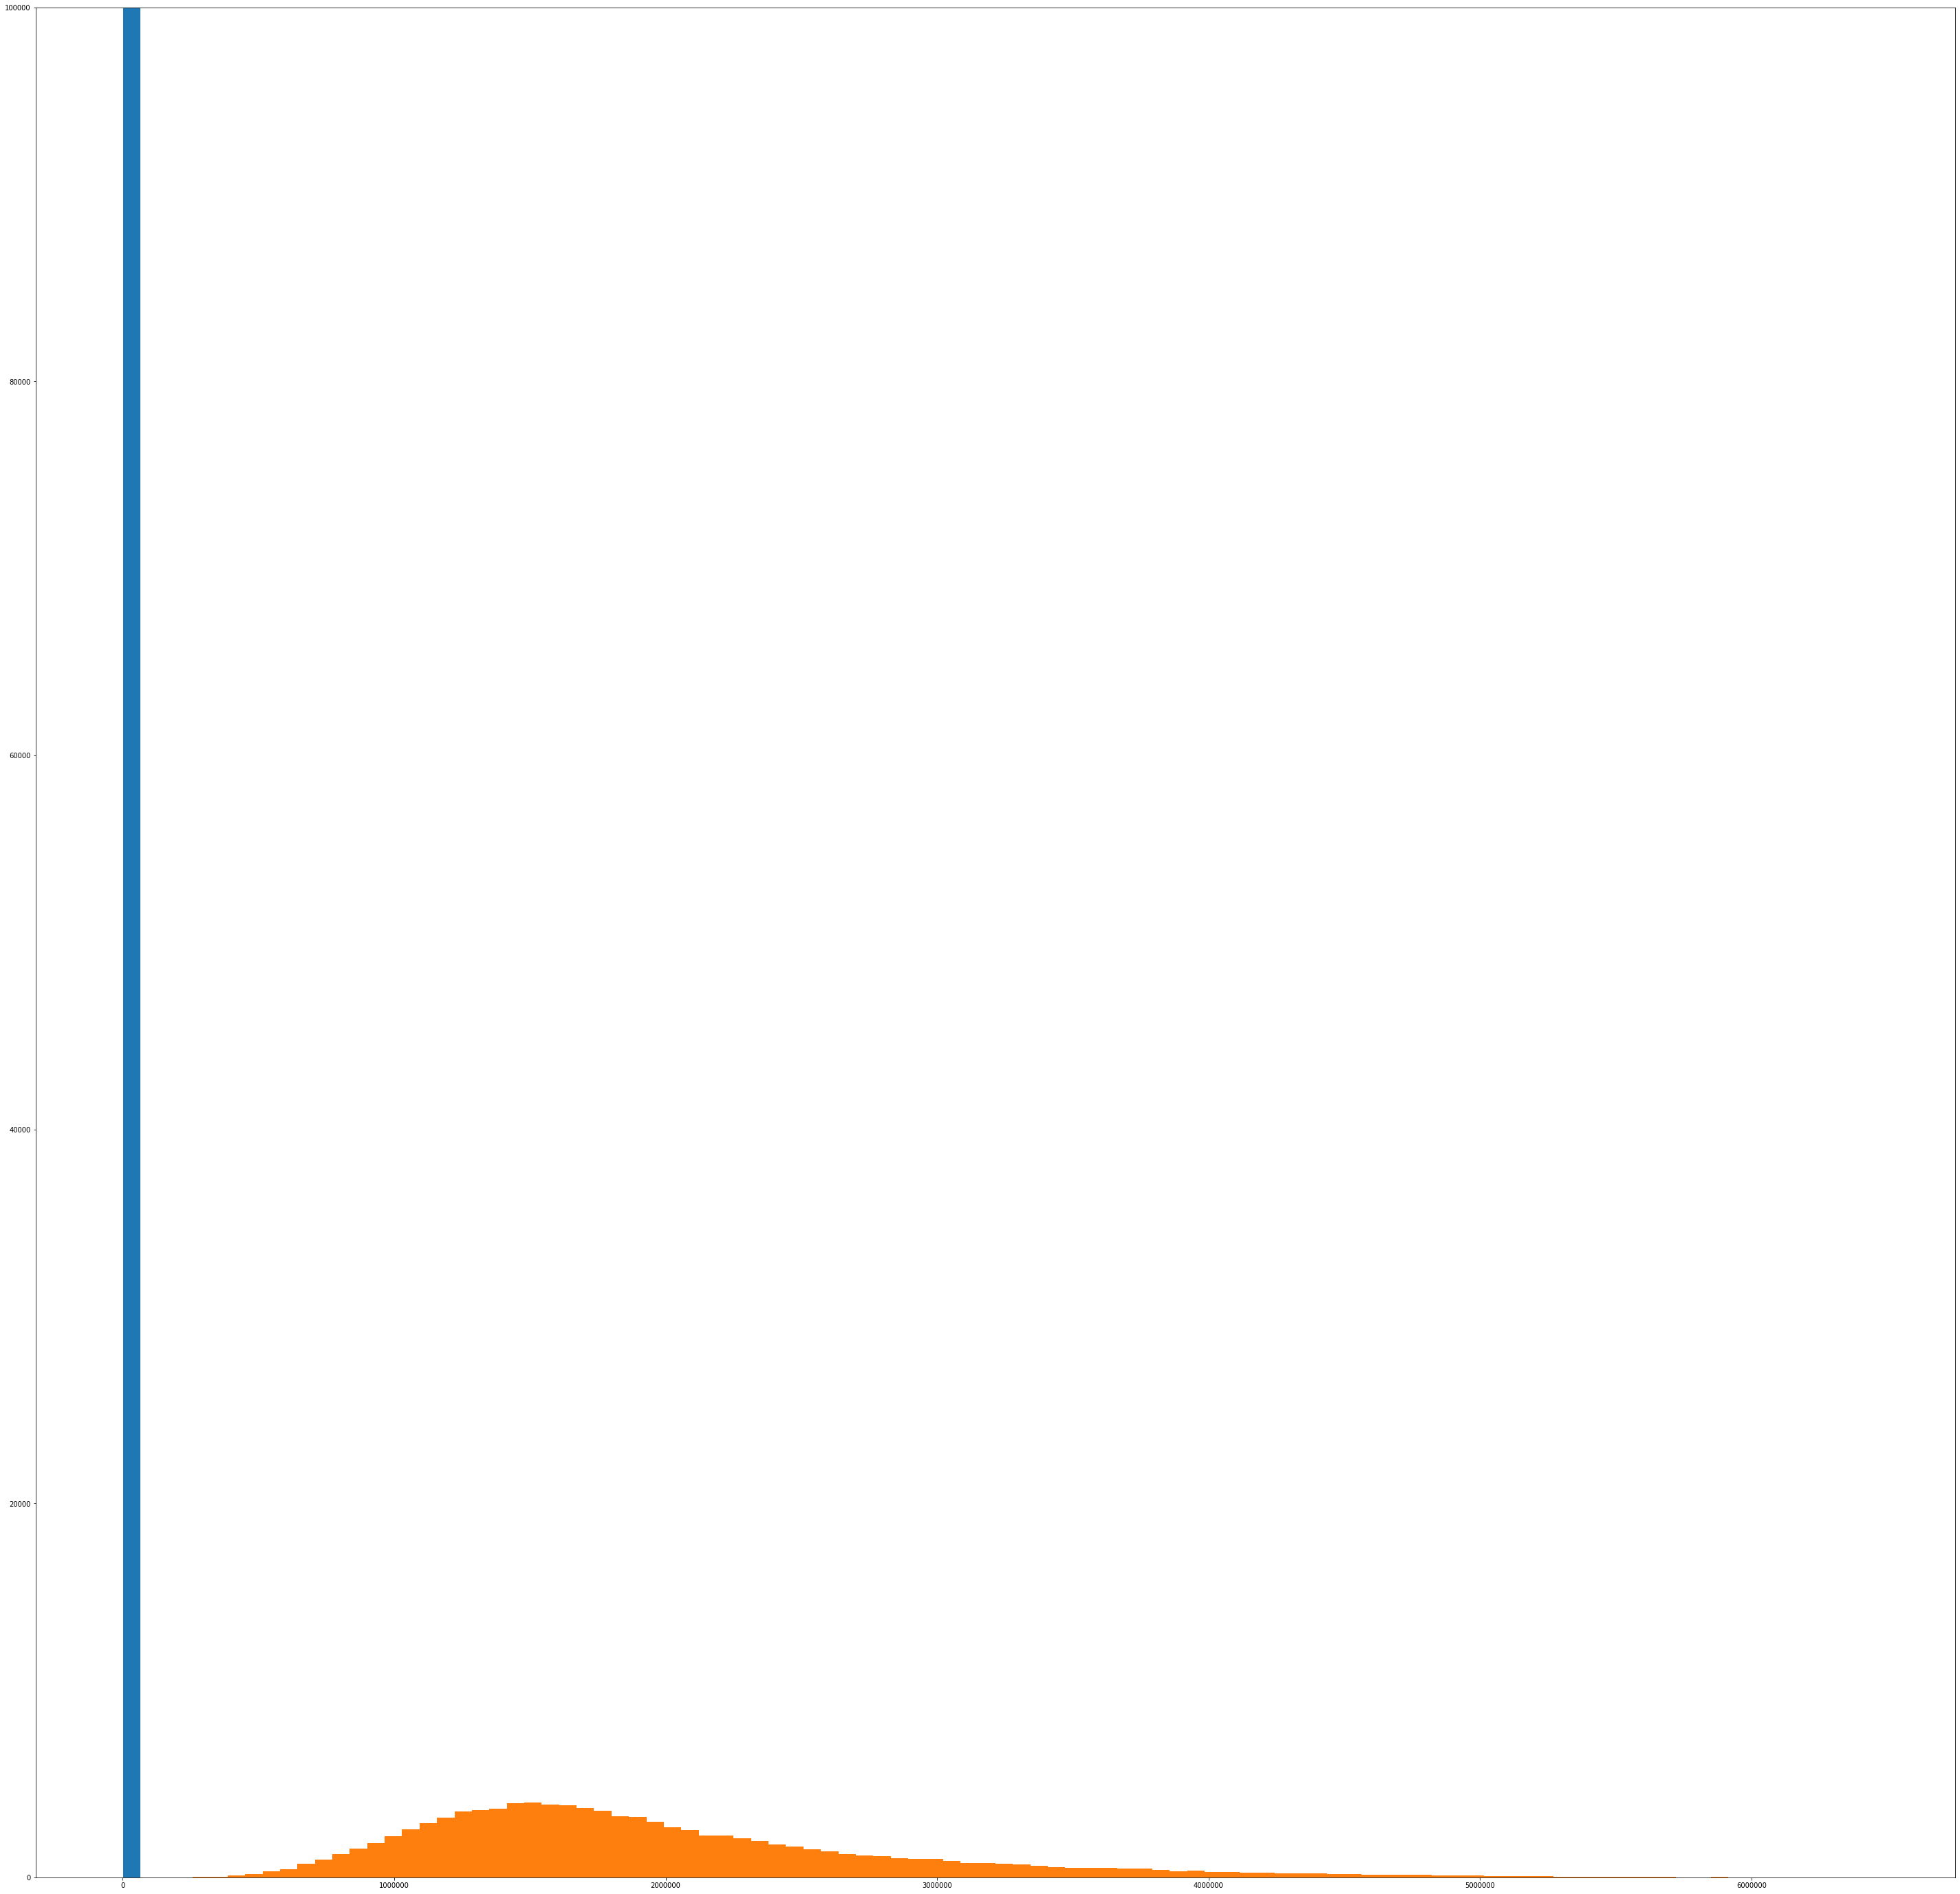

In [76]:
norm_higgs = 100 * higgs["mass"]
norm_qcd = 20000 * qcd["mass"]
fig, ax = plt.subplots(1,1)
list = [norm_higgs, norm_qcd]
ax.hist(list, stacked=True, bins=100, density=False)
plt.show()

Significance of Higgs peak: 1.67 sigma
Normalization: Area under the curve. It's already normalized to 1. Multiply the data by 50. For problem 2 only. Nhiggs = 50, Nqcd = 2000 for this one (expected yield); that's going to change in problem 2. The ratio should end up being the same as the significance.

-inf

In [82]:
import math
100 / math.sqrt(20000)

0.7071067811865475

## Problem 2

In [119]:
qcd_cut = []
for i in norm_qcd:
    if i > 1000000 and i < 2000000:
        qcd_cut.append(i)
        
len(qcd_cut)

53247

In [121]:
norm_qcd.size

100000

In [122]:
53427/100000*20000

10685.4

In [124]:
100/math.sqrt(10685.4)

0.9673967139667404

Do cuts when histogram is normalized to 1. Find the area, which is a fraction of 1. So you multiply that by the expected yield to get the Nqcd.

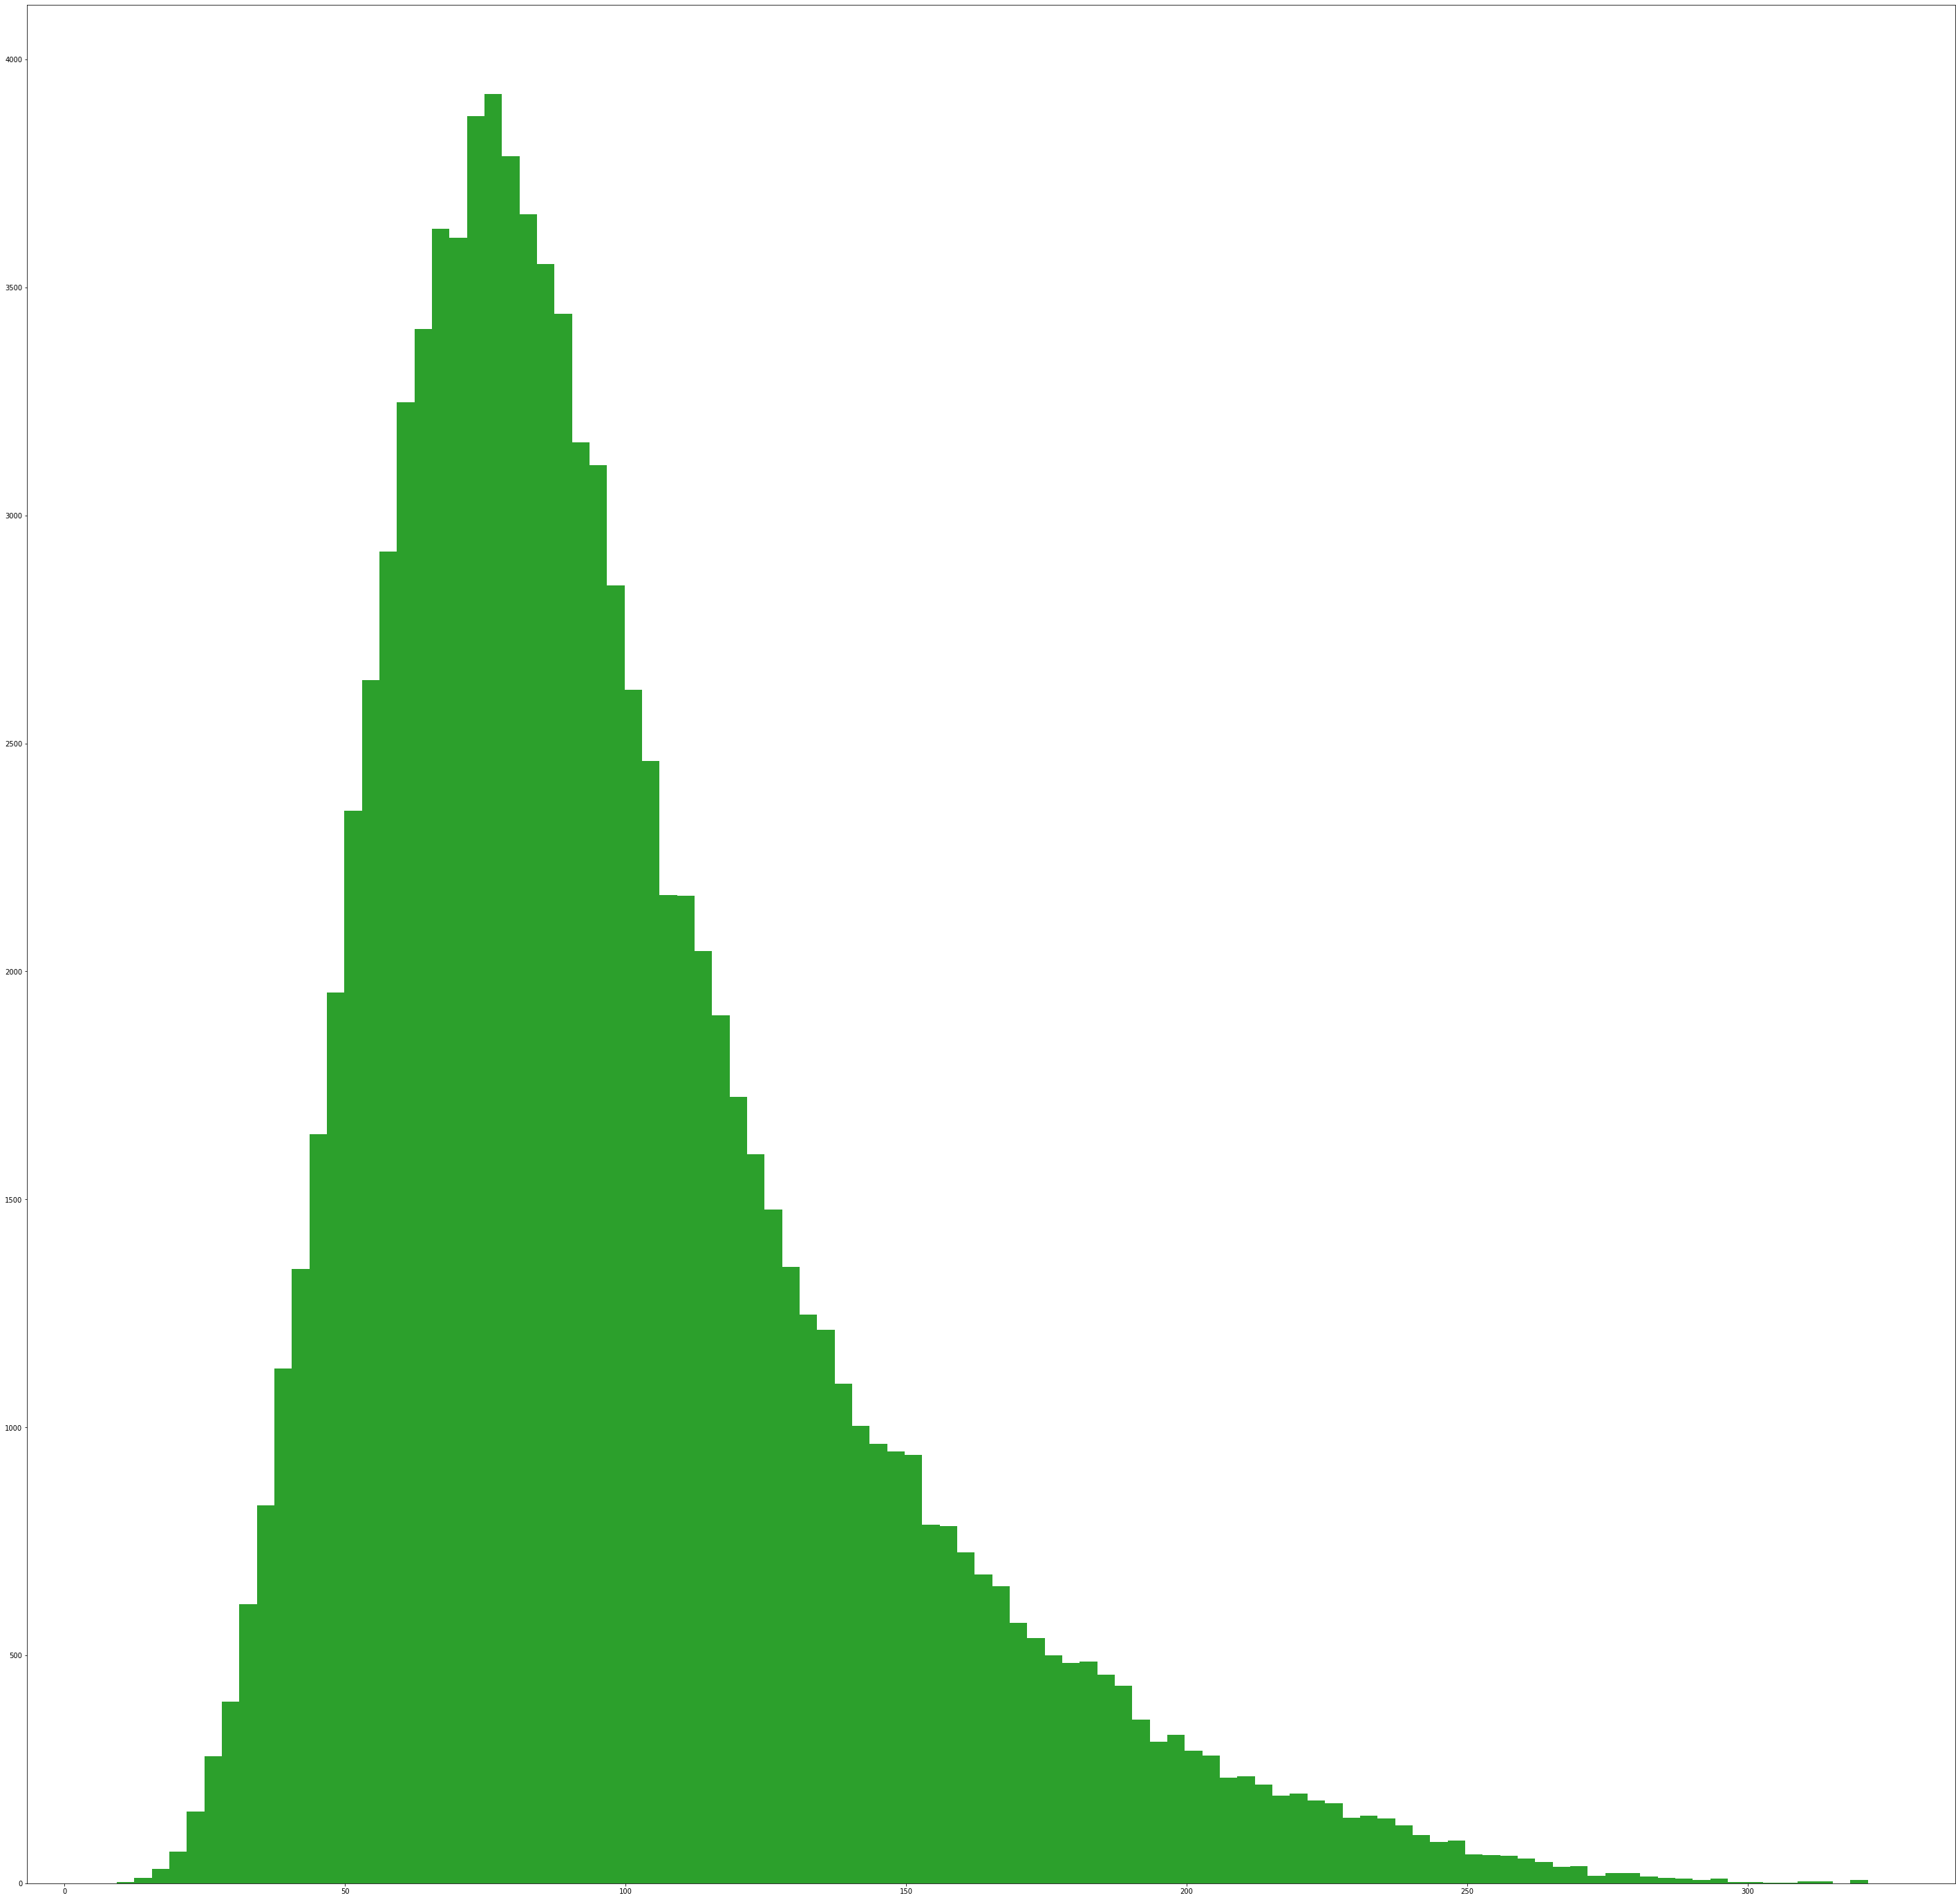

In [194]:
norm_higgs = 100 * higgs["mass"]
norm_qcd = 20000 * qcd["mass"]
fig, ax = plt.subplots(1,1)
list = [qcd["mass"], higgs["mass"]]
x2 = ax.hist(list, stacked=True, bins=100, density=True)
x3 = ax.hist(qcd["mass"], bins=100, density=False)
plt.show()

19.49100115025411


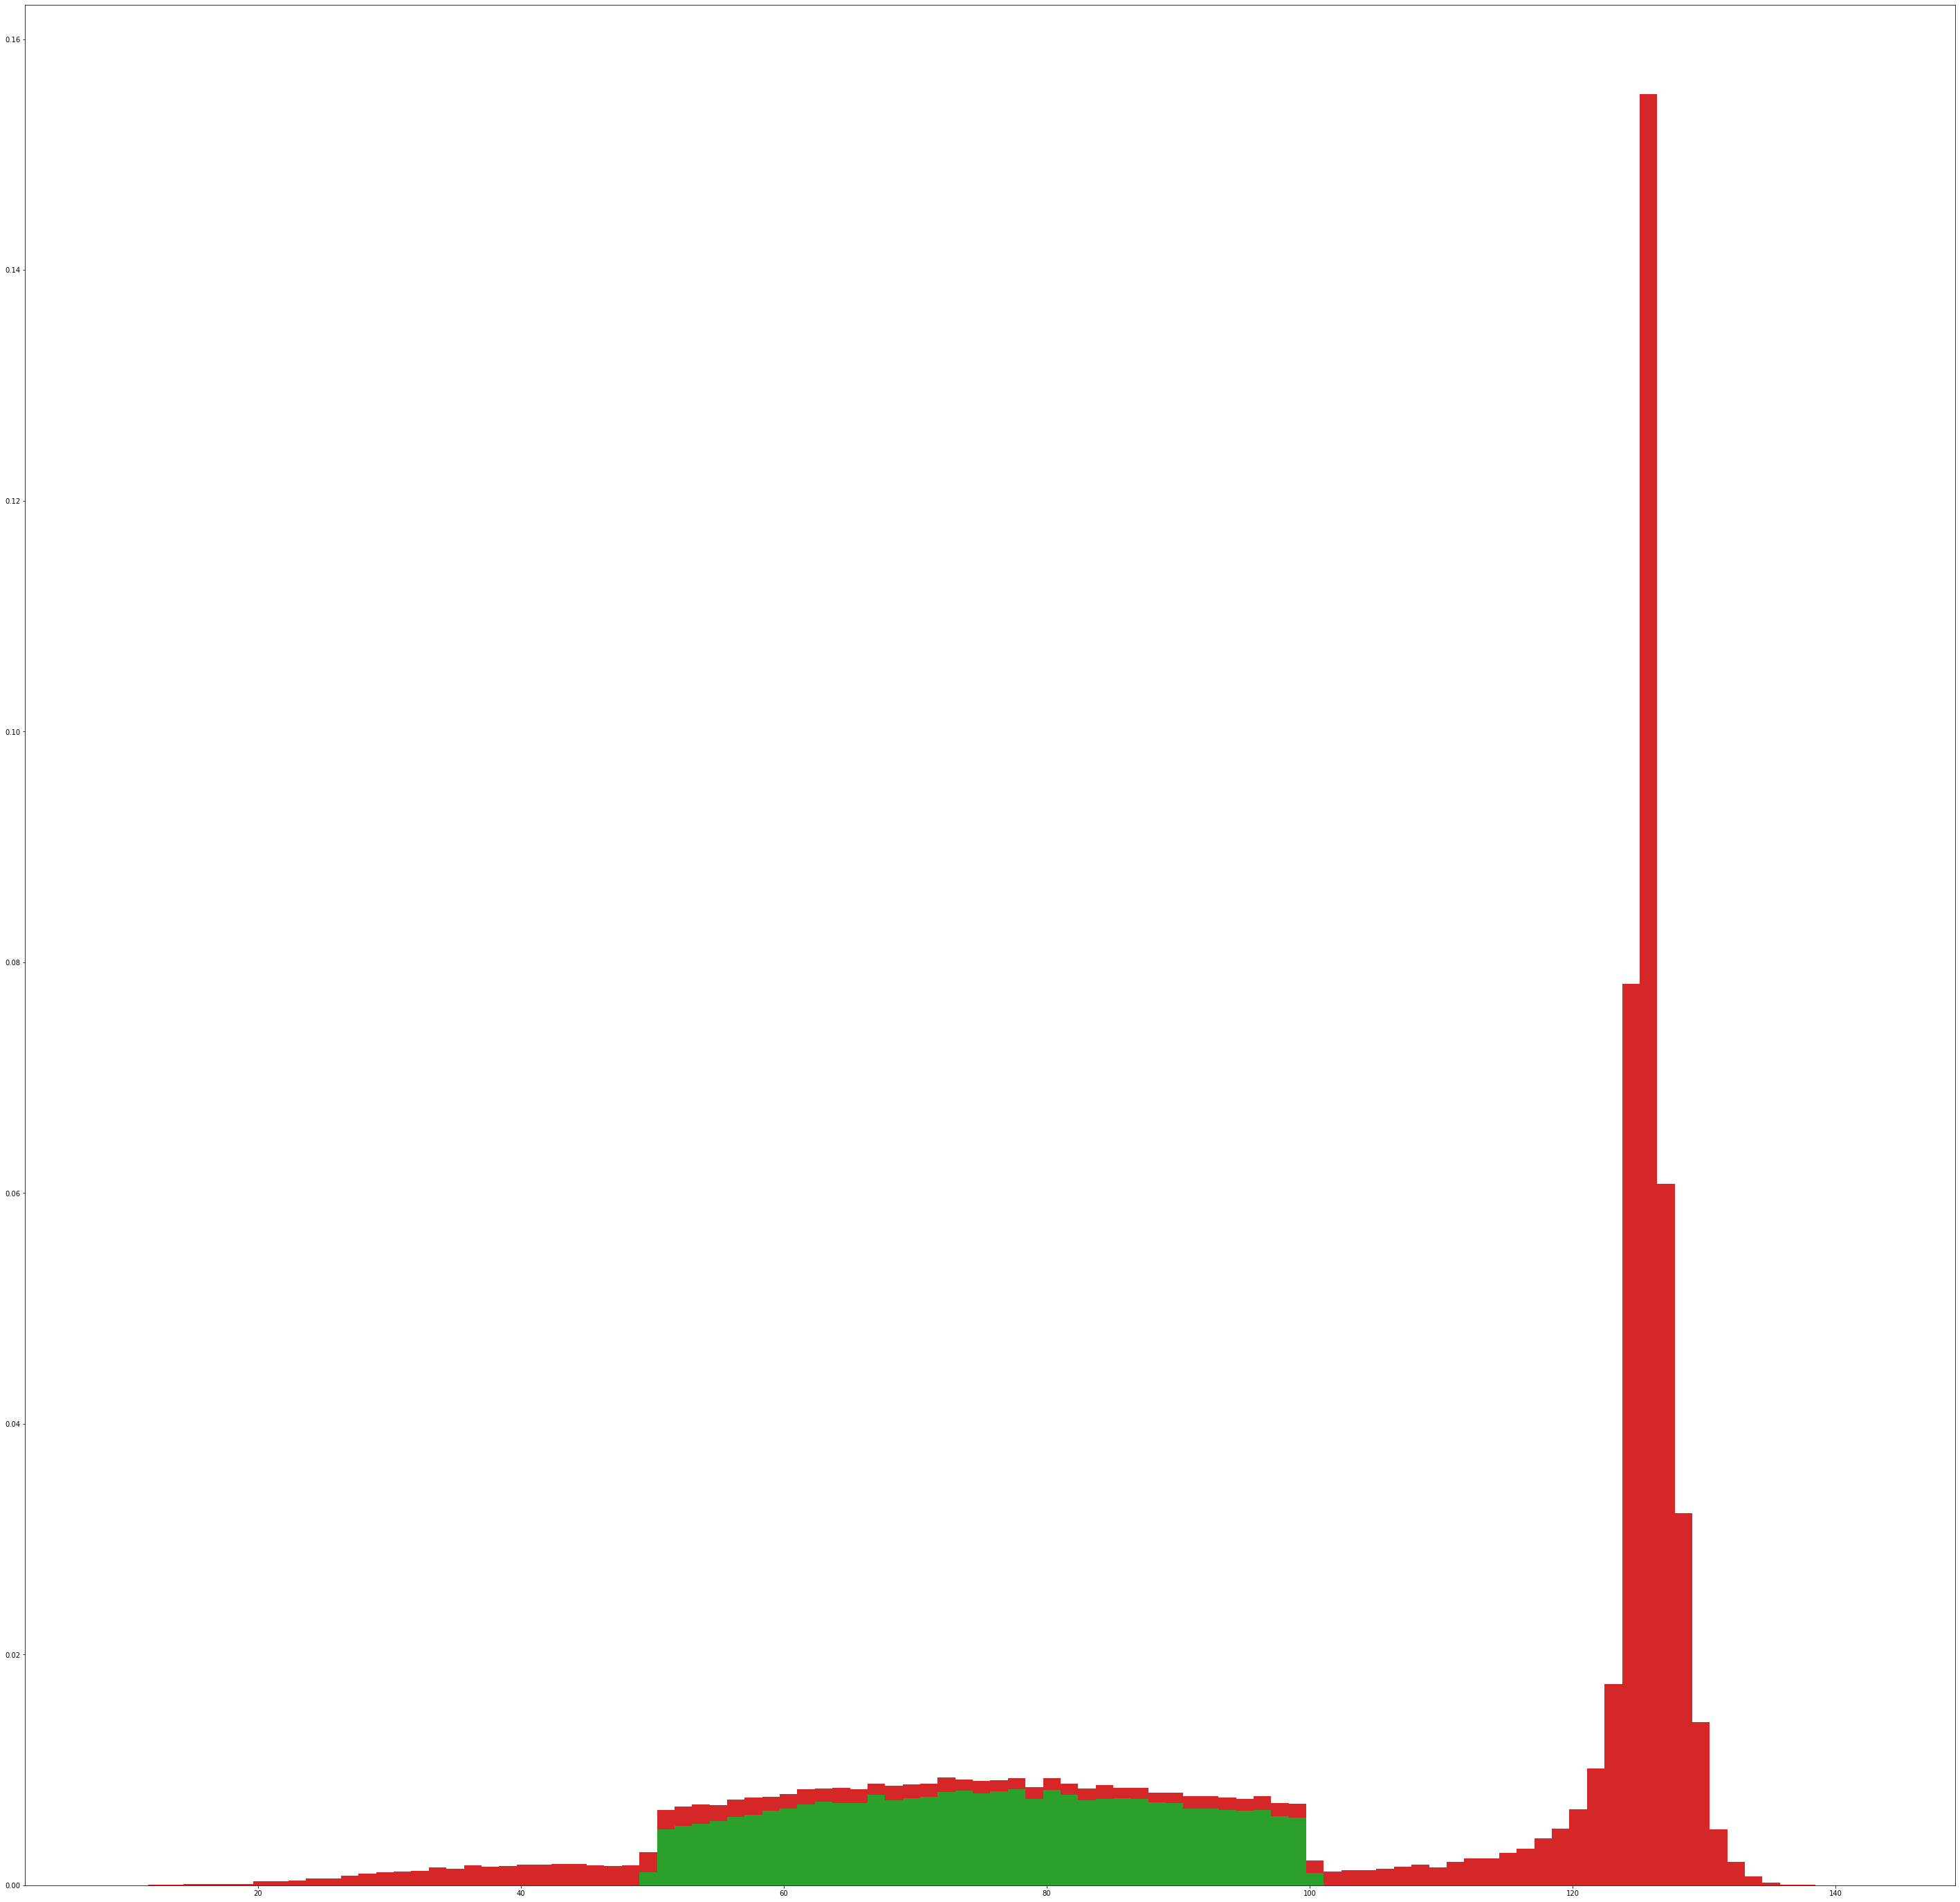

In [183]:
qcd_cut = []
for i in qcd["mass"]:
    if i > 50 and i < 100:
        qcd_cut.append(i)
        
len(qcd_cut)
fig, ax = plt.subplots(1,1)
hist2 = ax.hist([qcd_cut, higgs["mass"]], density=True, stacked=True, bins=100)
ax.hist([qcd_cut, higgs["mass"]], density=True, stacked=True, bins=100)

y = 0
for i in range(100):
    y = y + hist2[0][0][i] * hist2[1][i]
print(y)

plt.show()

In [136]:
53247/100000 * 20000

10649.4

Oh, this ends up being the same as what we did earlier.

In [195]:
y = 0
for i in range(100):
    y = y + x3[0][i] * x3[1][i]
y

9617400.329768123

8.856931713549407


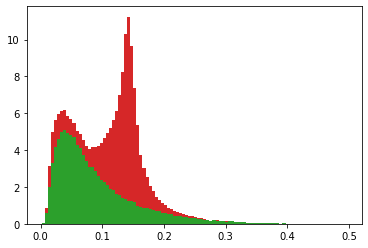

In [5]:
qcd_cut = []
for i in qcd["ee2"]:
    qcd_cut.append(i)
        
len(qcd_cut)
fig, ax = plt.subplots(1,1)
hist2 = ax.hist([qcd_cut, higgs["ee2"]], density=True, stacked=True, bins=100)
ax.hist([qcd_cut, higgs["ee2"]], density=True, stacked=True, bins=100)

y = 0
for i in range(100):
    y = y + hist2[0][0][i] * hist2[1][i]
print(y)

plt.show()

12.041483718979046


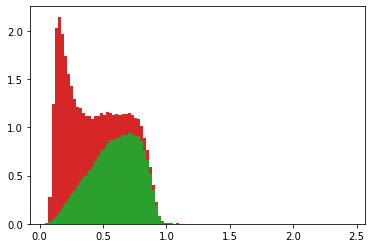

In [6]:
qcd_cut = []
for i in qcd["t2"]:
    qcd_cut.append(i)
        
len(qcd_cut)
fig, ax = plt.subplots(1,1)
hist2 = ax.hist([qcd_cut, higgs["t2"]], density=True, stacked=True, bins=100)
ax.hist([qcd_cut, higgs["t2"]], density=True, stacked=True, bins=100)

y = 0
for i in range(100):
    y = y + hist2[0][0][i] * hist2[1][i]
print(y)

plt.show()

8.894894957718929


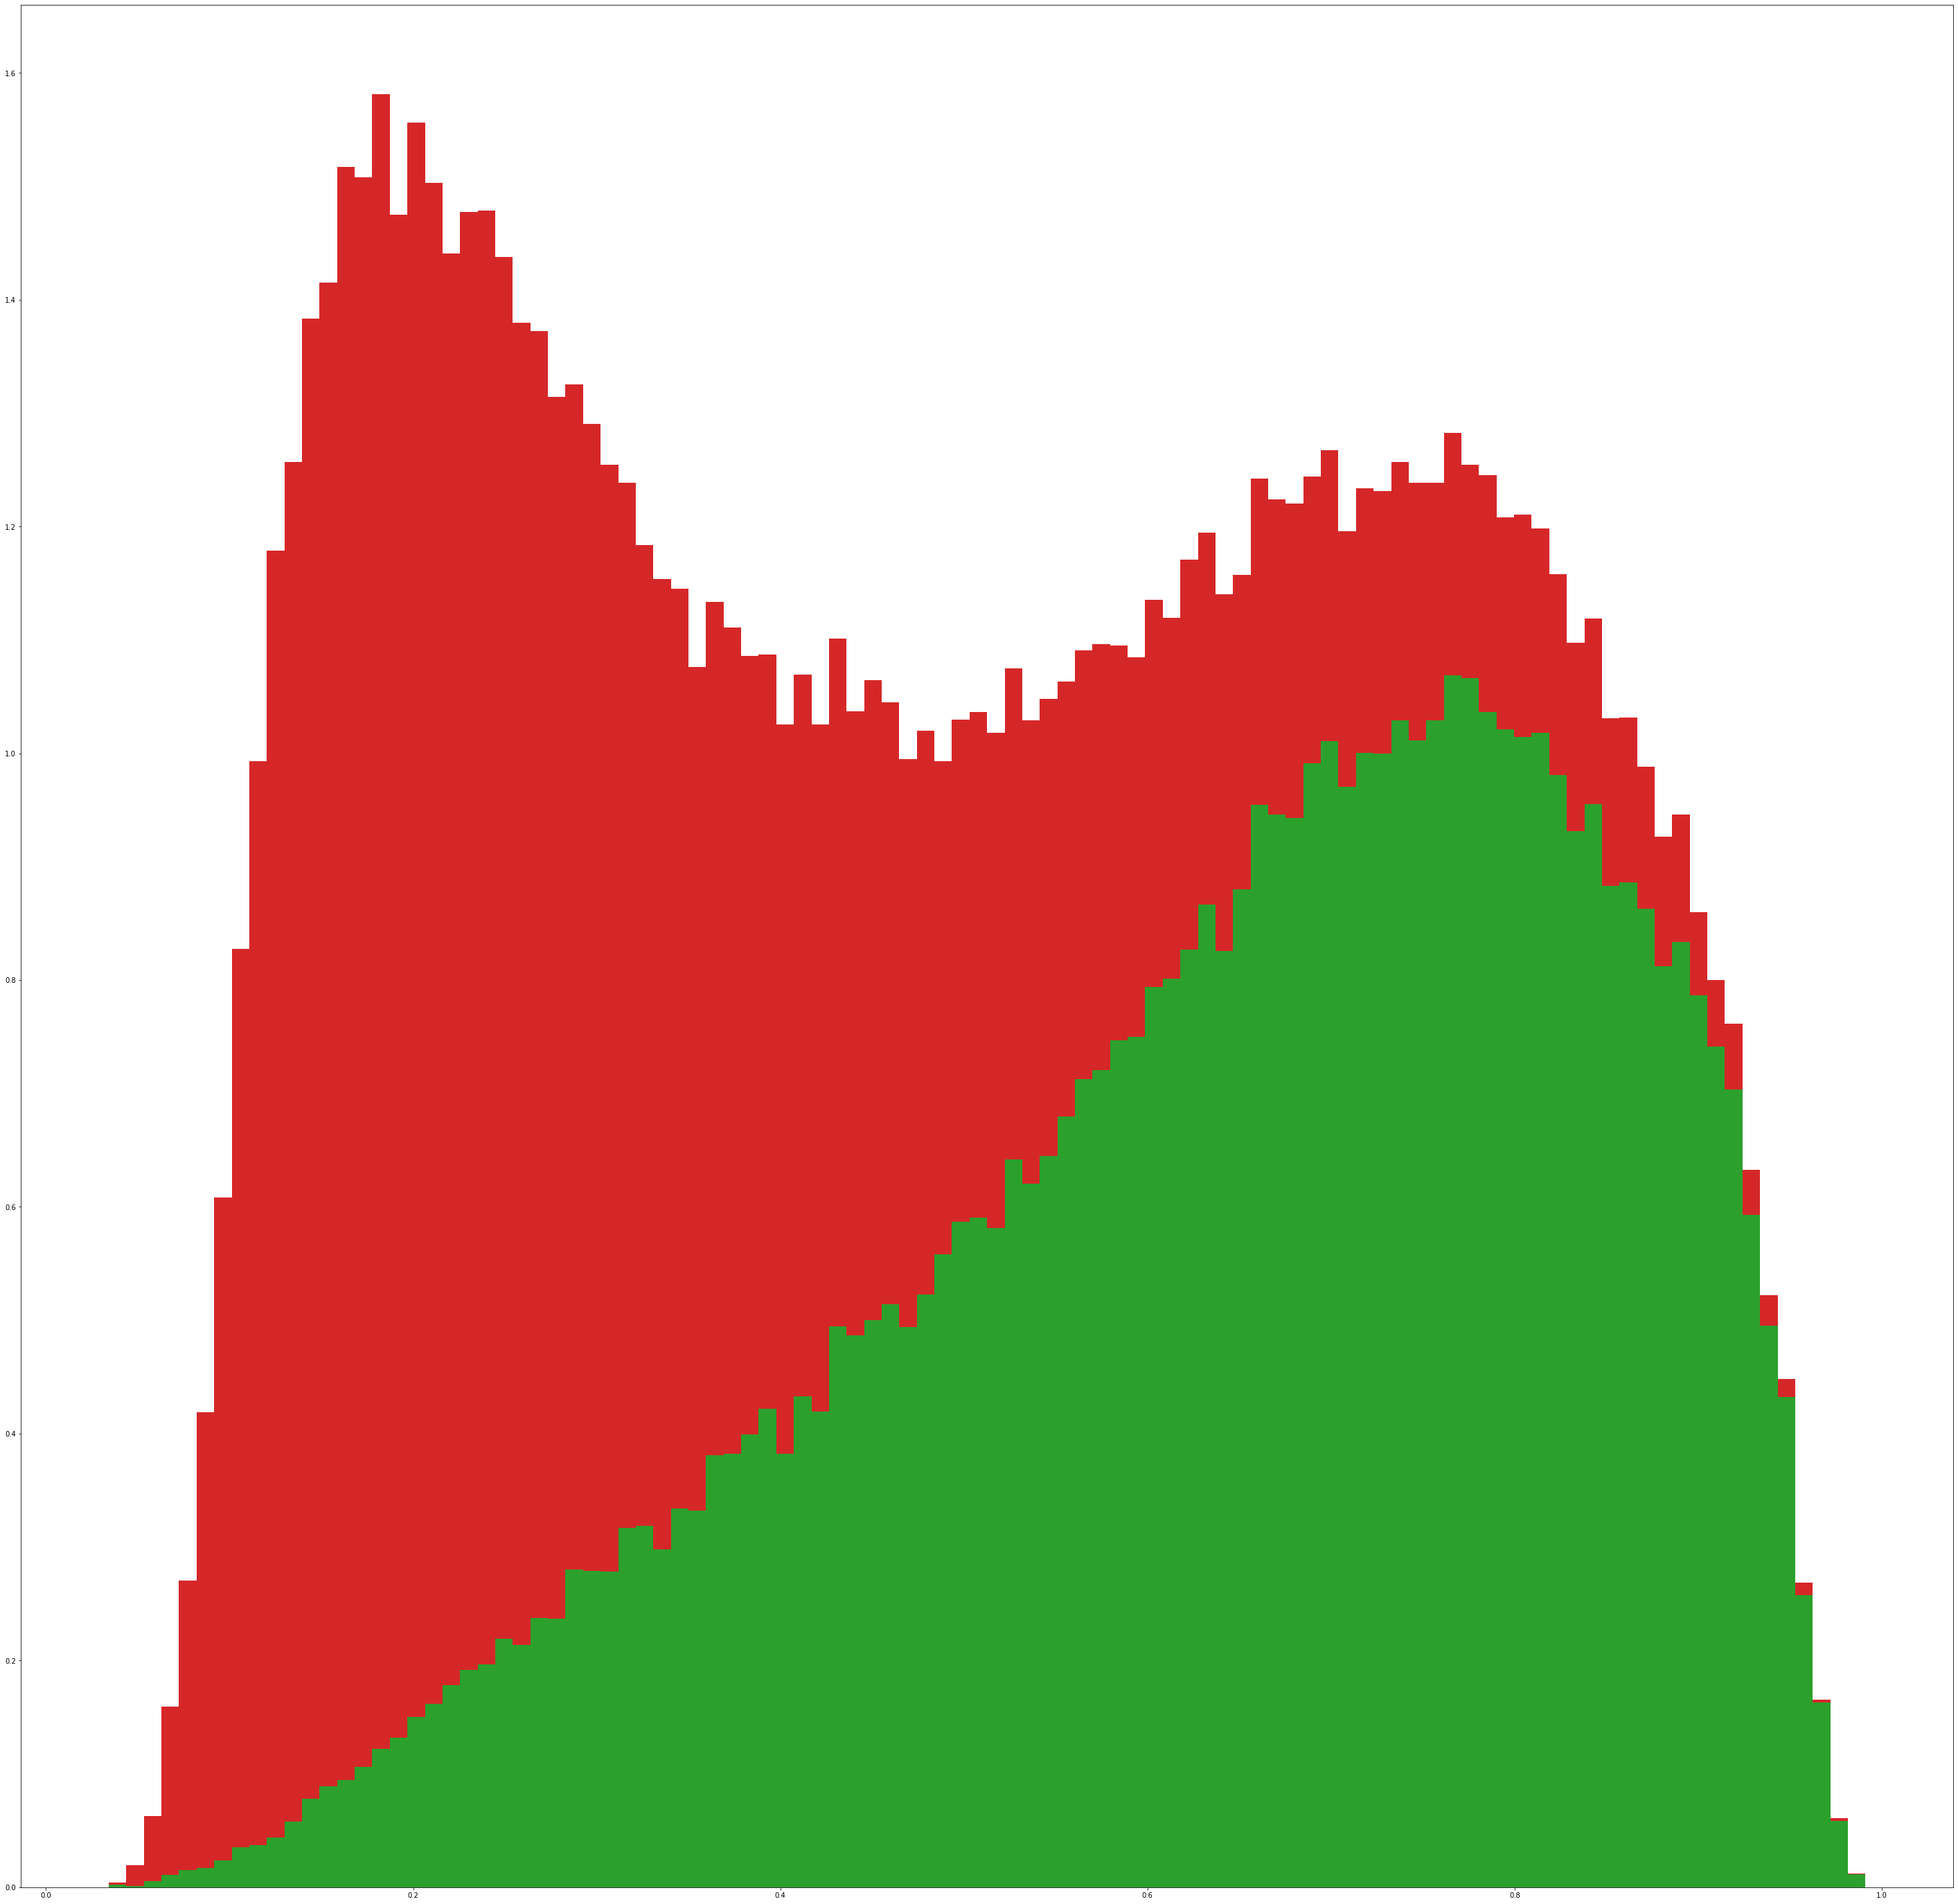

In [41]:
qcd_cut = []
for i in qcd["t21"]:
    qcd_cut.append(i)
        
len(qcd_cut)
fig, ax = plt.subplots(1,1)
hist2 = ax.hist([qcd_cut, higgs["t21"]], density=True, stacked=True, bins=100)
ax.hist([qcd_cut, higgs["t21"]], density=True, stacked=True, bins=100)

y = 0
z = 0
for i in range(100):
    y = y + hist2[0][0][i] * hist2[1][i]
    z = z + hist2[0][1][i] * hist2[1][i]
print(z/math.sqrt(y))

plt.show()

In the few graphs above, we explore some potential discriminating factors, without mass cuts. t21 looks promising so let's take a mass cut.

18.19764631783585


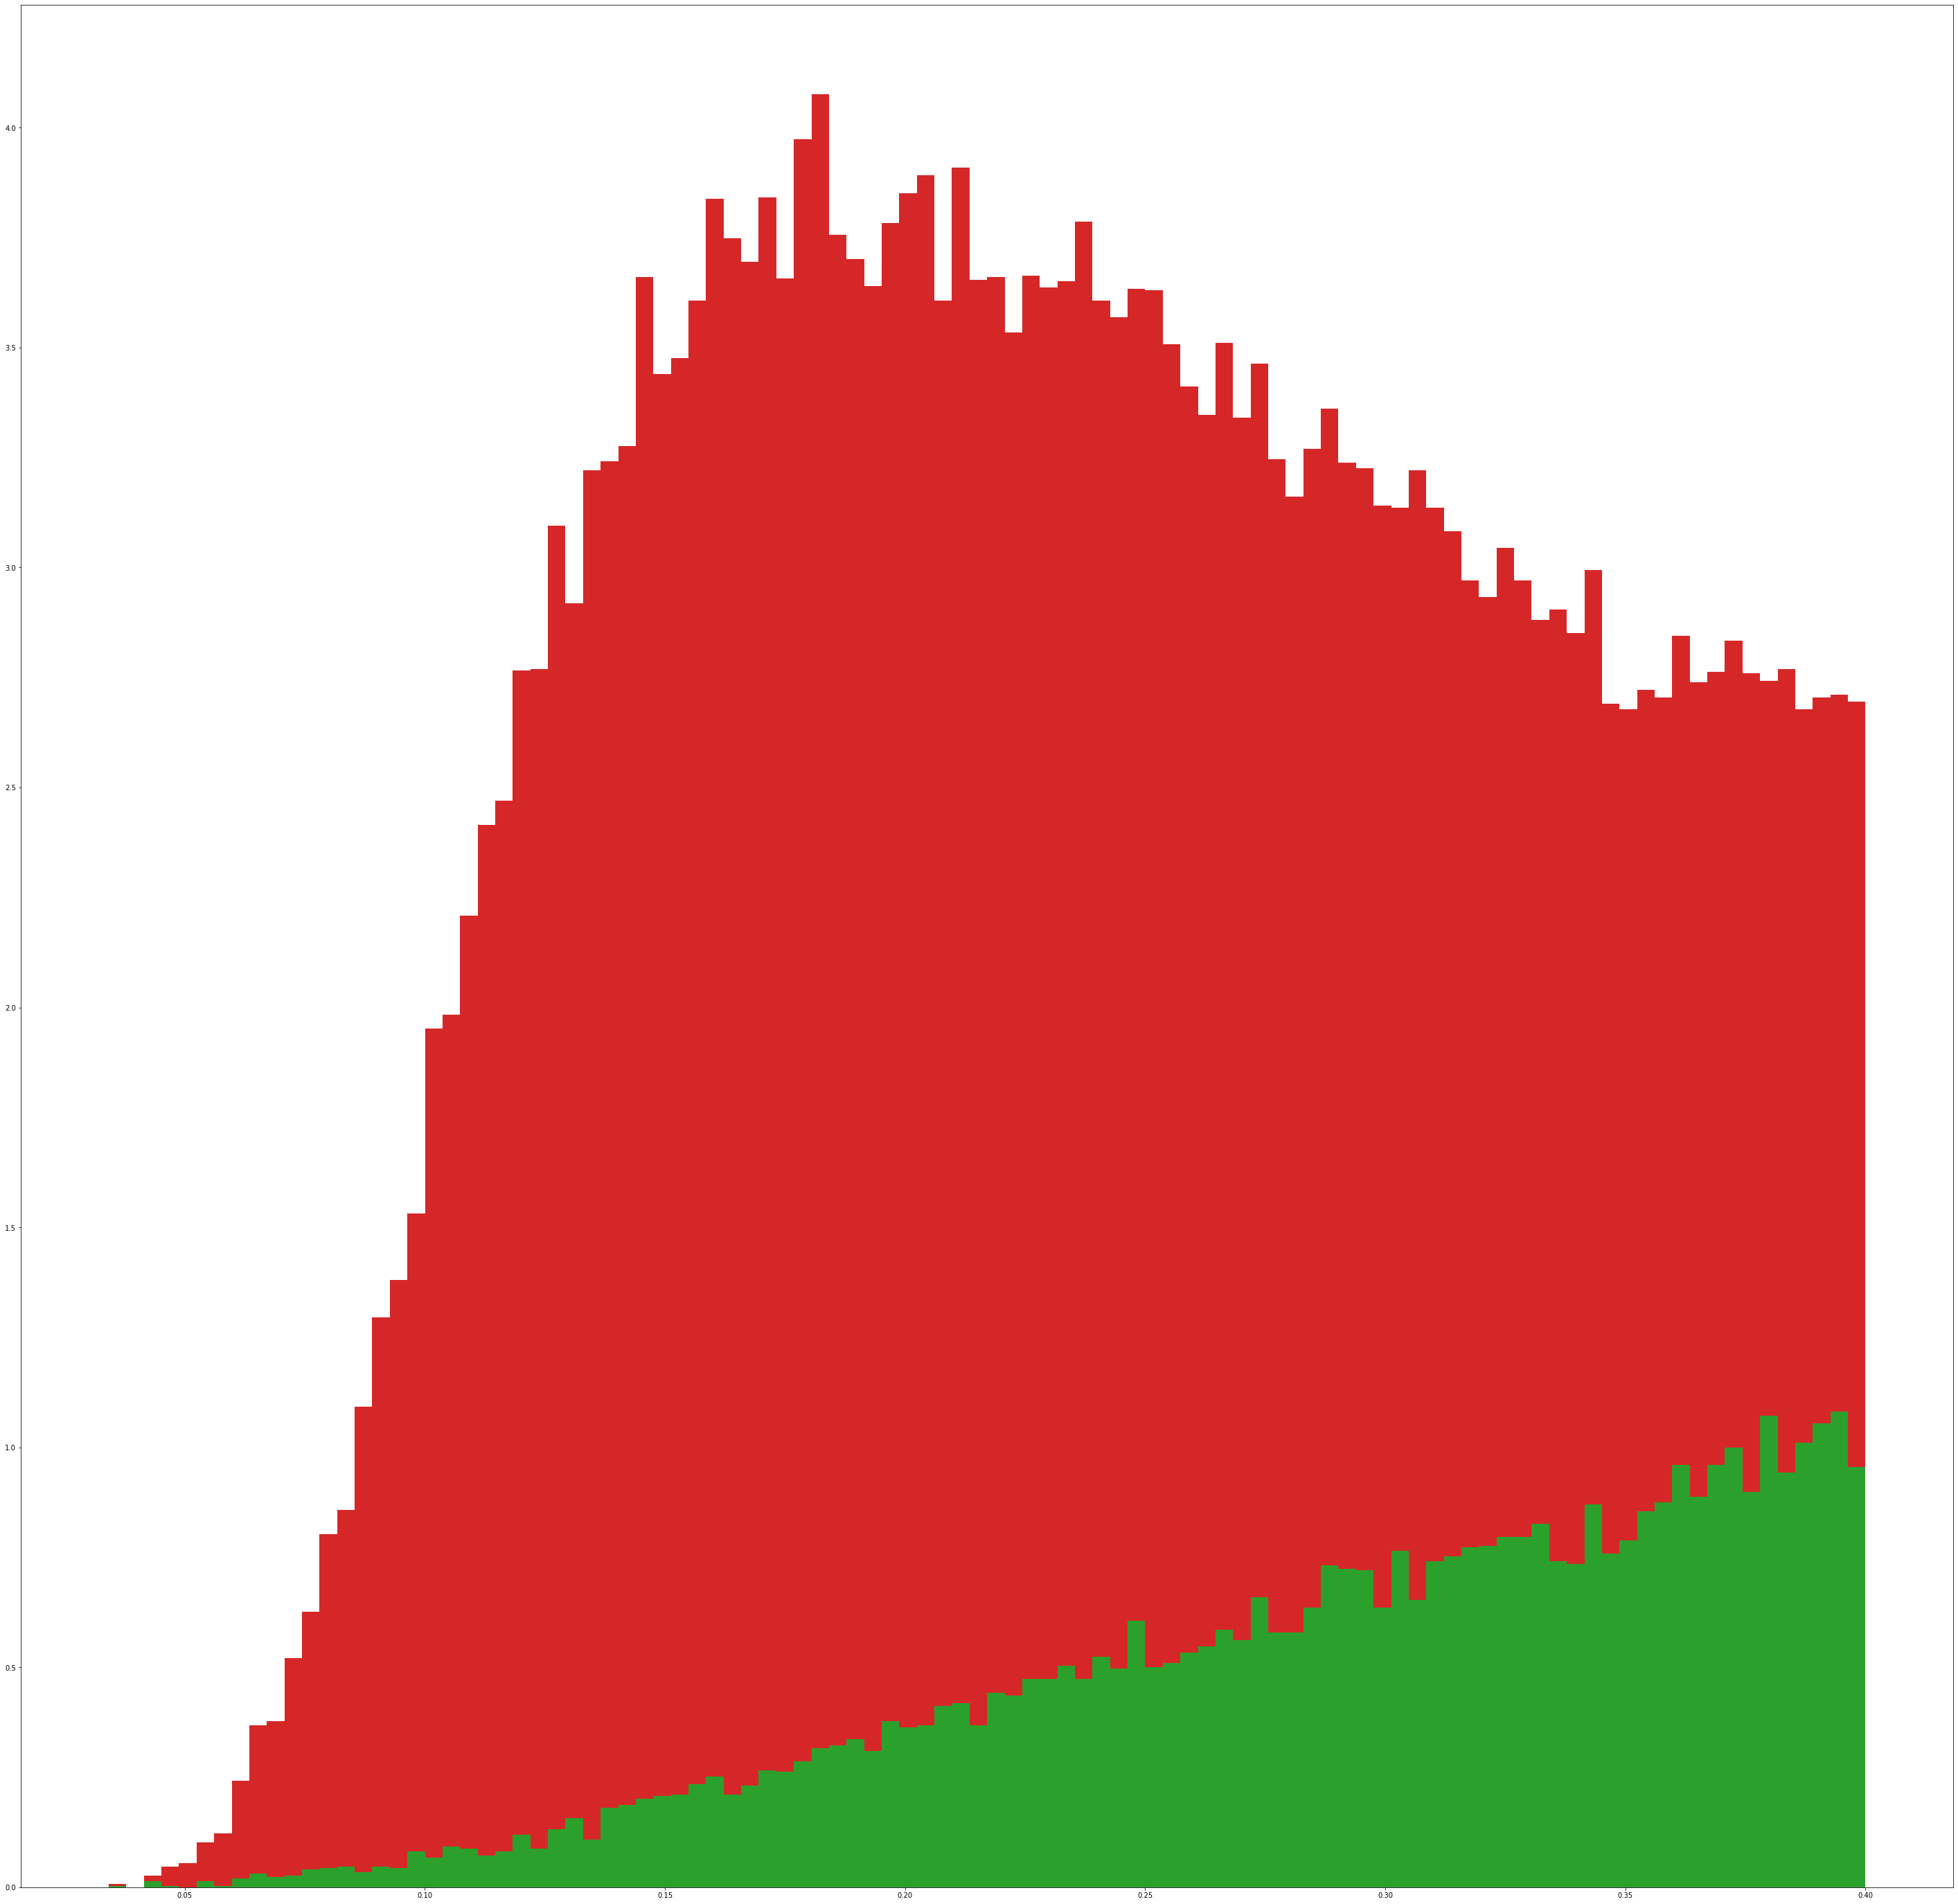

In [107]:
qcd_cut = []
for i in qcd["t21"]:
    if i > 0 and i < 0.4:
        qcd_cut.append(i)
        
higgs_cut = []
for i in higgs["t21"]:
    if i > 0 and i < 0.4:
        higgs_cut.append(i)
        
len(qcd_cut)
fig, ax = plt.subplots(1,1)
hist2 = ax.hist([qcd_cut, higgs_cut], density=True, stacked=True, bins=100)
ax.hist([qcd_cut, higgs_cut], density=True, stacked=True, bins=100)

y = 0
z = 0
for i in range(100):
    y = y + hist2[0][0][i] * hist2[1][i]
    z = z + hist2[0][1][i] * hist2[1][i]
print(z/math.sqrt(y))

plt.show()

From this other paper https://arxiv.org/pdf/1409.6298.pdf (from Lab 6):
>Signal jets will be characterized by a small value of D(β), while background jets will pre-dominantly have large D2 . 

Let's look at d2.

1.3106914220122015


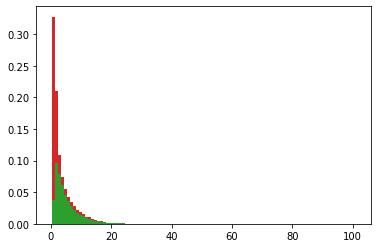

In [30]:
qcd_cut = []
for i in qcd["d2"]:
    qcd_cut.append(i)
        
len(qcd_cut)
fig, ax = plt.subplots(1,1)
hist2 = ax.hist([qcd_cut, higgs["d2"]], density=True, stacked=True, bins=100)
ax.hist([qcd_cut, higgs["d2"]], density=True, stacked=True, bins=100)

y = 0
z = 0
for i in range(100):
    y = y + hist2[0][0][i] * hist2[1][i]
    z = z + hist2[0][1][i] * hist2[1][i]
print(z/math.sqrt(y))

plt.show()

This doesn't look very discriminating. Let's take a mass cut to see if we can improve the significance.

1.7267595656791603


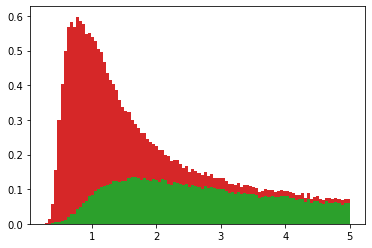

In [35]:
qcd_cut = []
for i in qcd["d2"]:
    if i > 0 and i < 5:
        qcd_cut.append(i)
        
higgs_cut = []
for i in higgs["d2"]:
    if i > 0 and i < 5:
        higgs_cut.append(i)
        
len(qcd_cut)
fig, ax = plt.subplots(1,1)
hist2 = ax.hist([qcd_cut, higgs_cut], density=True, stacked=True, bins=100)
ax.hist([qcd_cut, higgs_cut], density=True, stacked=True, bins=100)

y = 0
z = 0
for i in range(100):
    y = y + hist2[0][0][i] * hist2[1][i]
    z = z + hist2[0][1][i] * hist2[1][i]
print(z/math.sqrt(y))

plt.show()

15.195590183819972


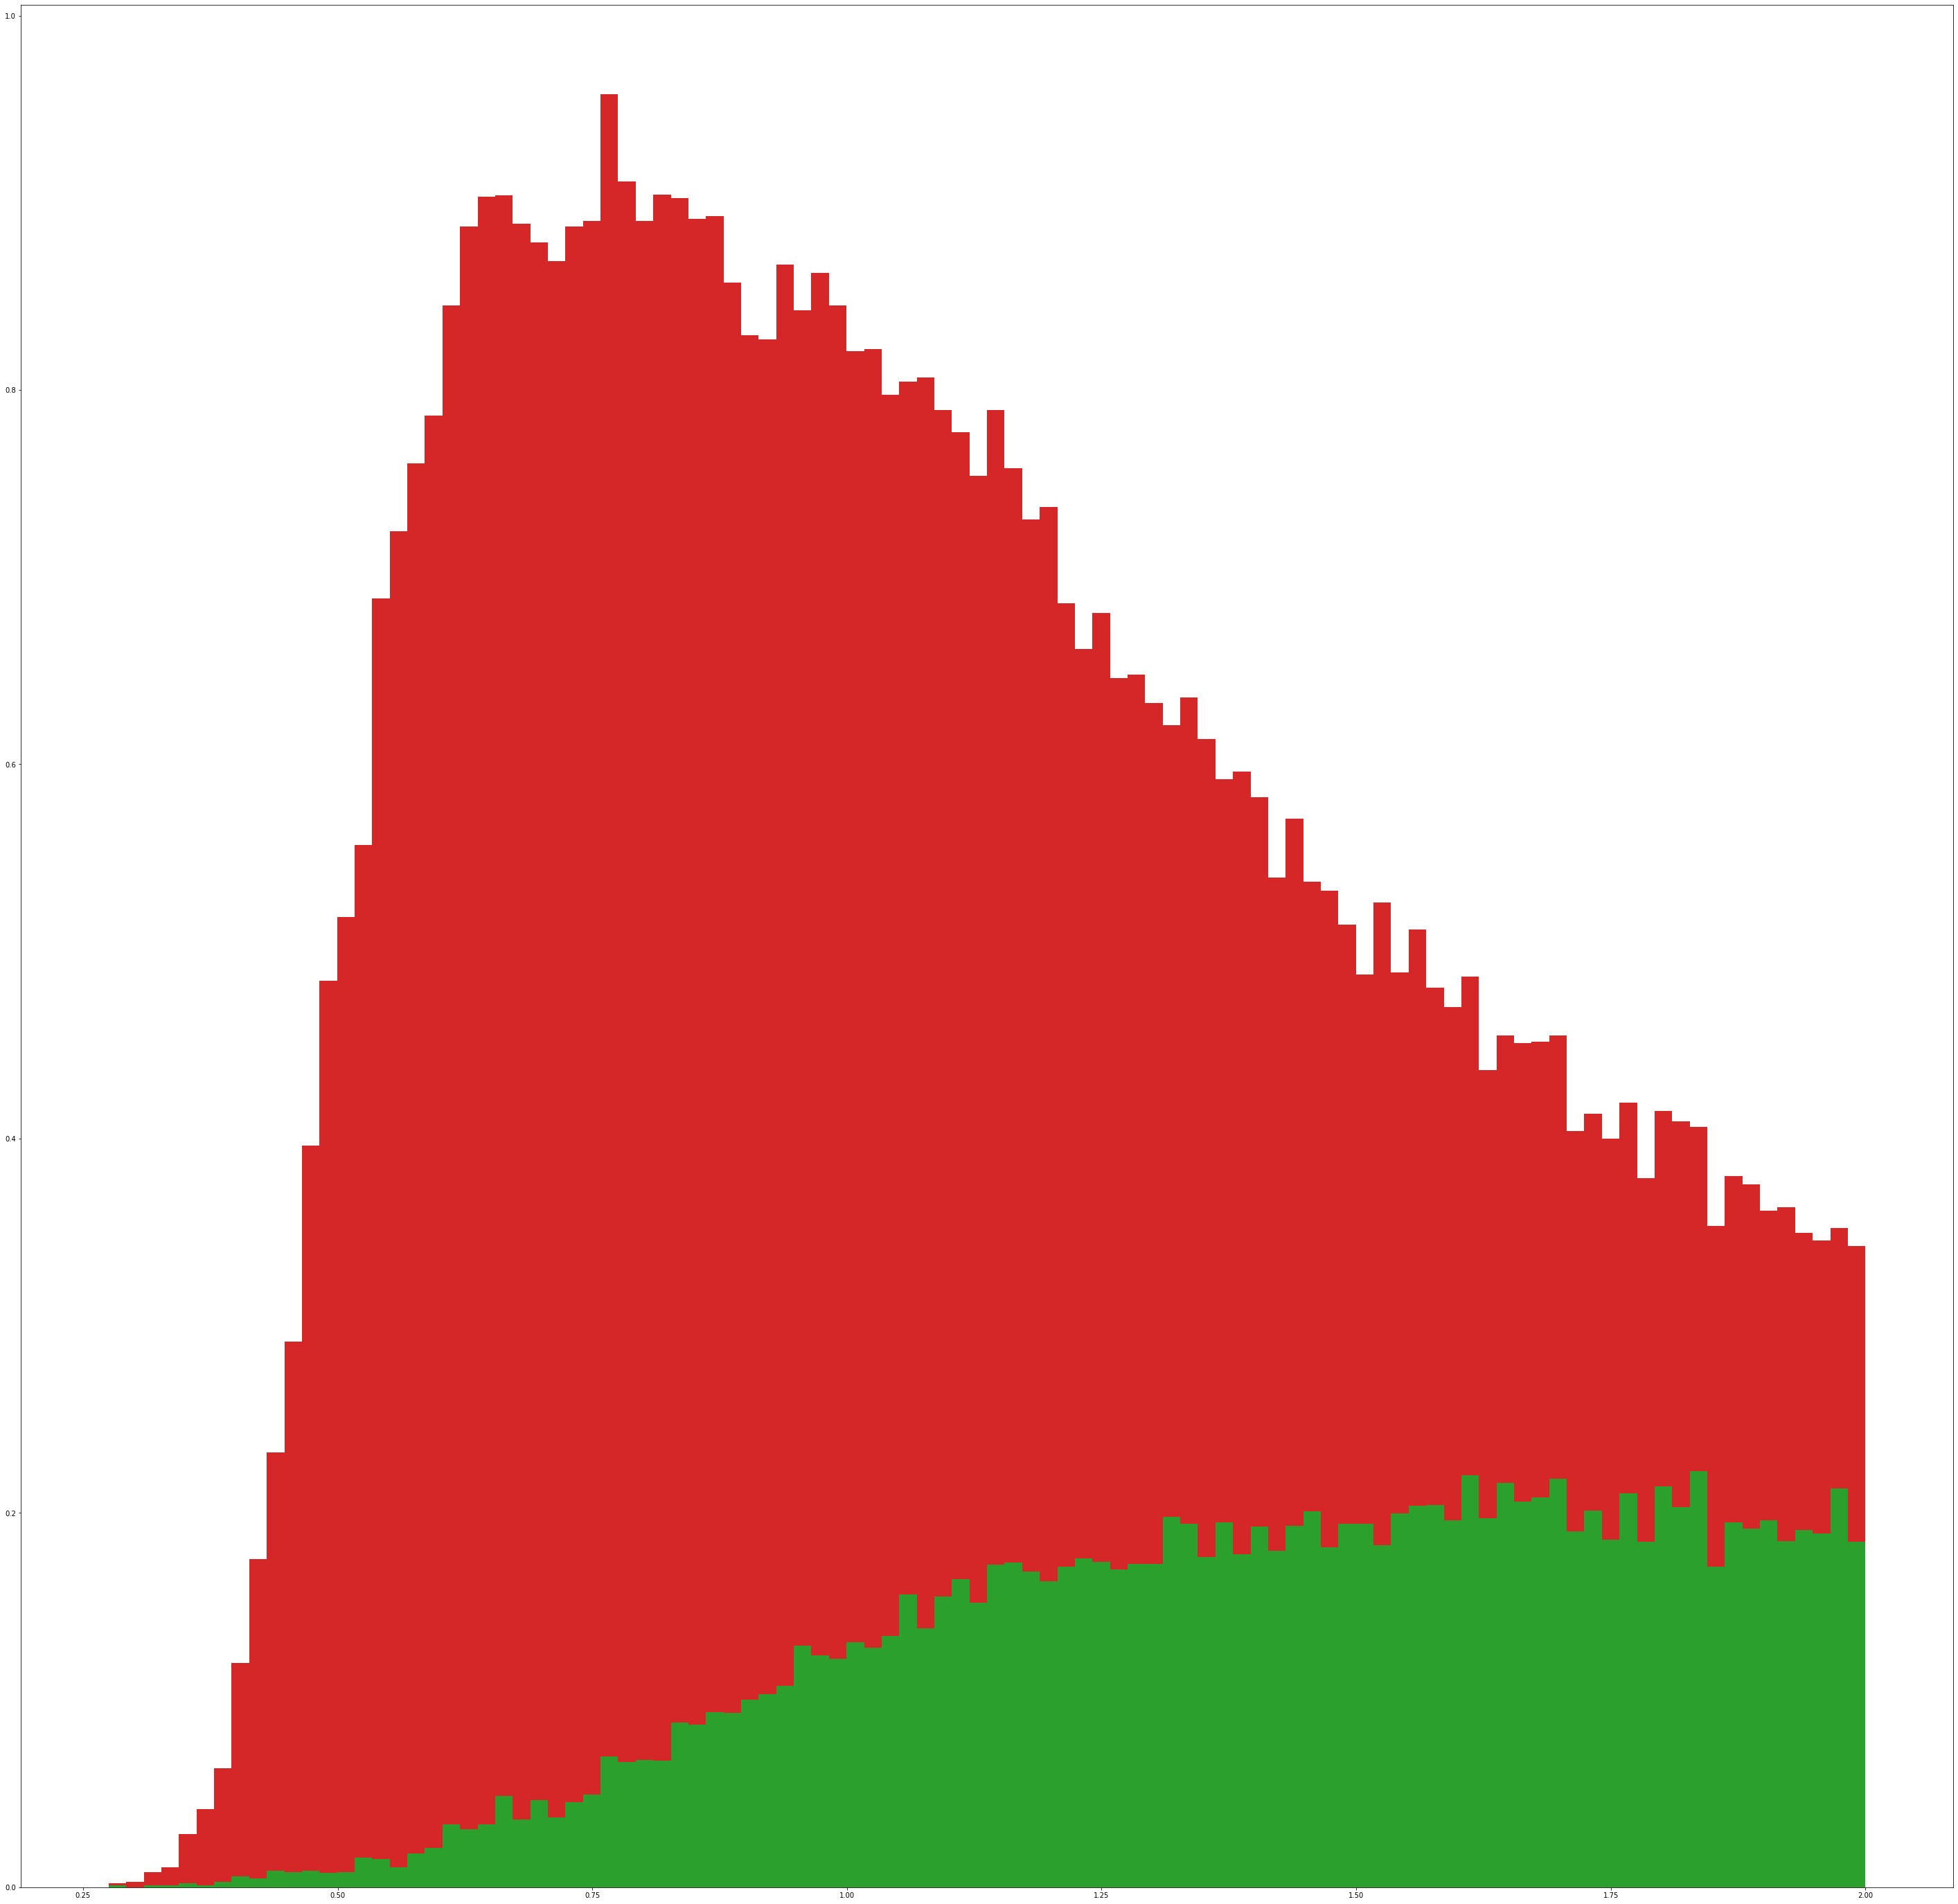

In [125]:
qcd_cut = []
for i in qcd["d2"]:
    if i > 0 and i < 2:
        qcd_cut.append(i)
        
higgs_cut = []
for i in higgs["d2"]:
    if i > 0 and i < 2:
        higgs_cut.append(i)
        
len(qcd_cut)
fig, ax = plt.subplots(1,1)
hist2 = ax.hist([qcd_cut, higgs_cut], density=True, stacked=True, bins=100)
ax.hist([qcd_cut, higgs_cut], density=True, stacked=True, bins=100)

y = 0
z = 0
for i in range(100):
    y = y + hist2[0][0][i] * hist2[1][i]
    z = z + hist2[0][1][i] * hist2[1][i]
print(z/math.sqrt(y))

plt.show()

32.978732010520204


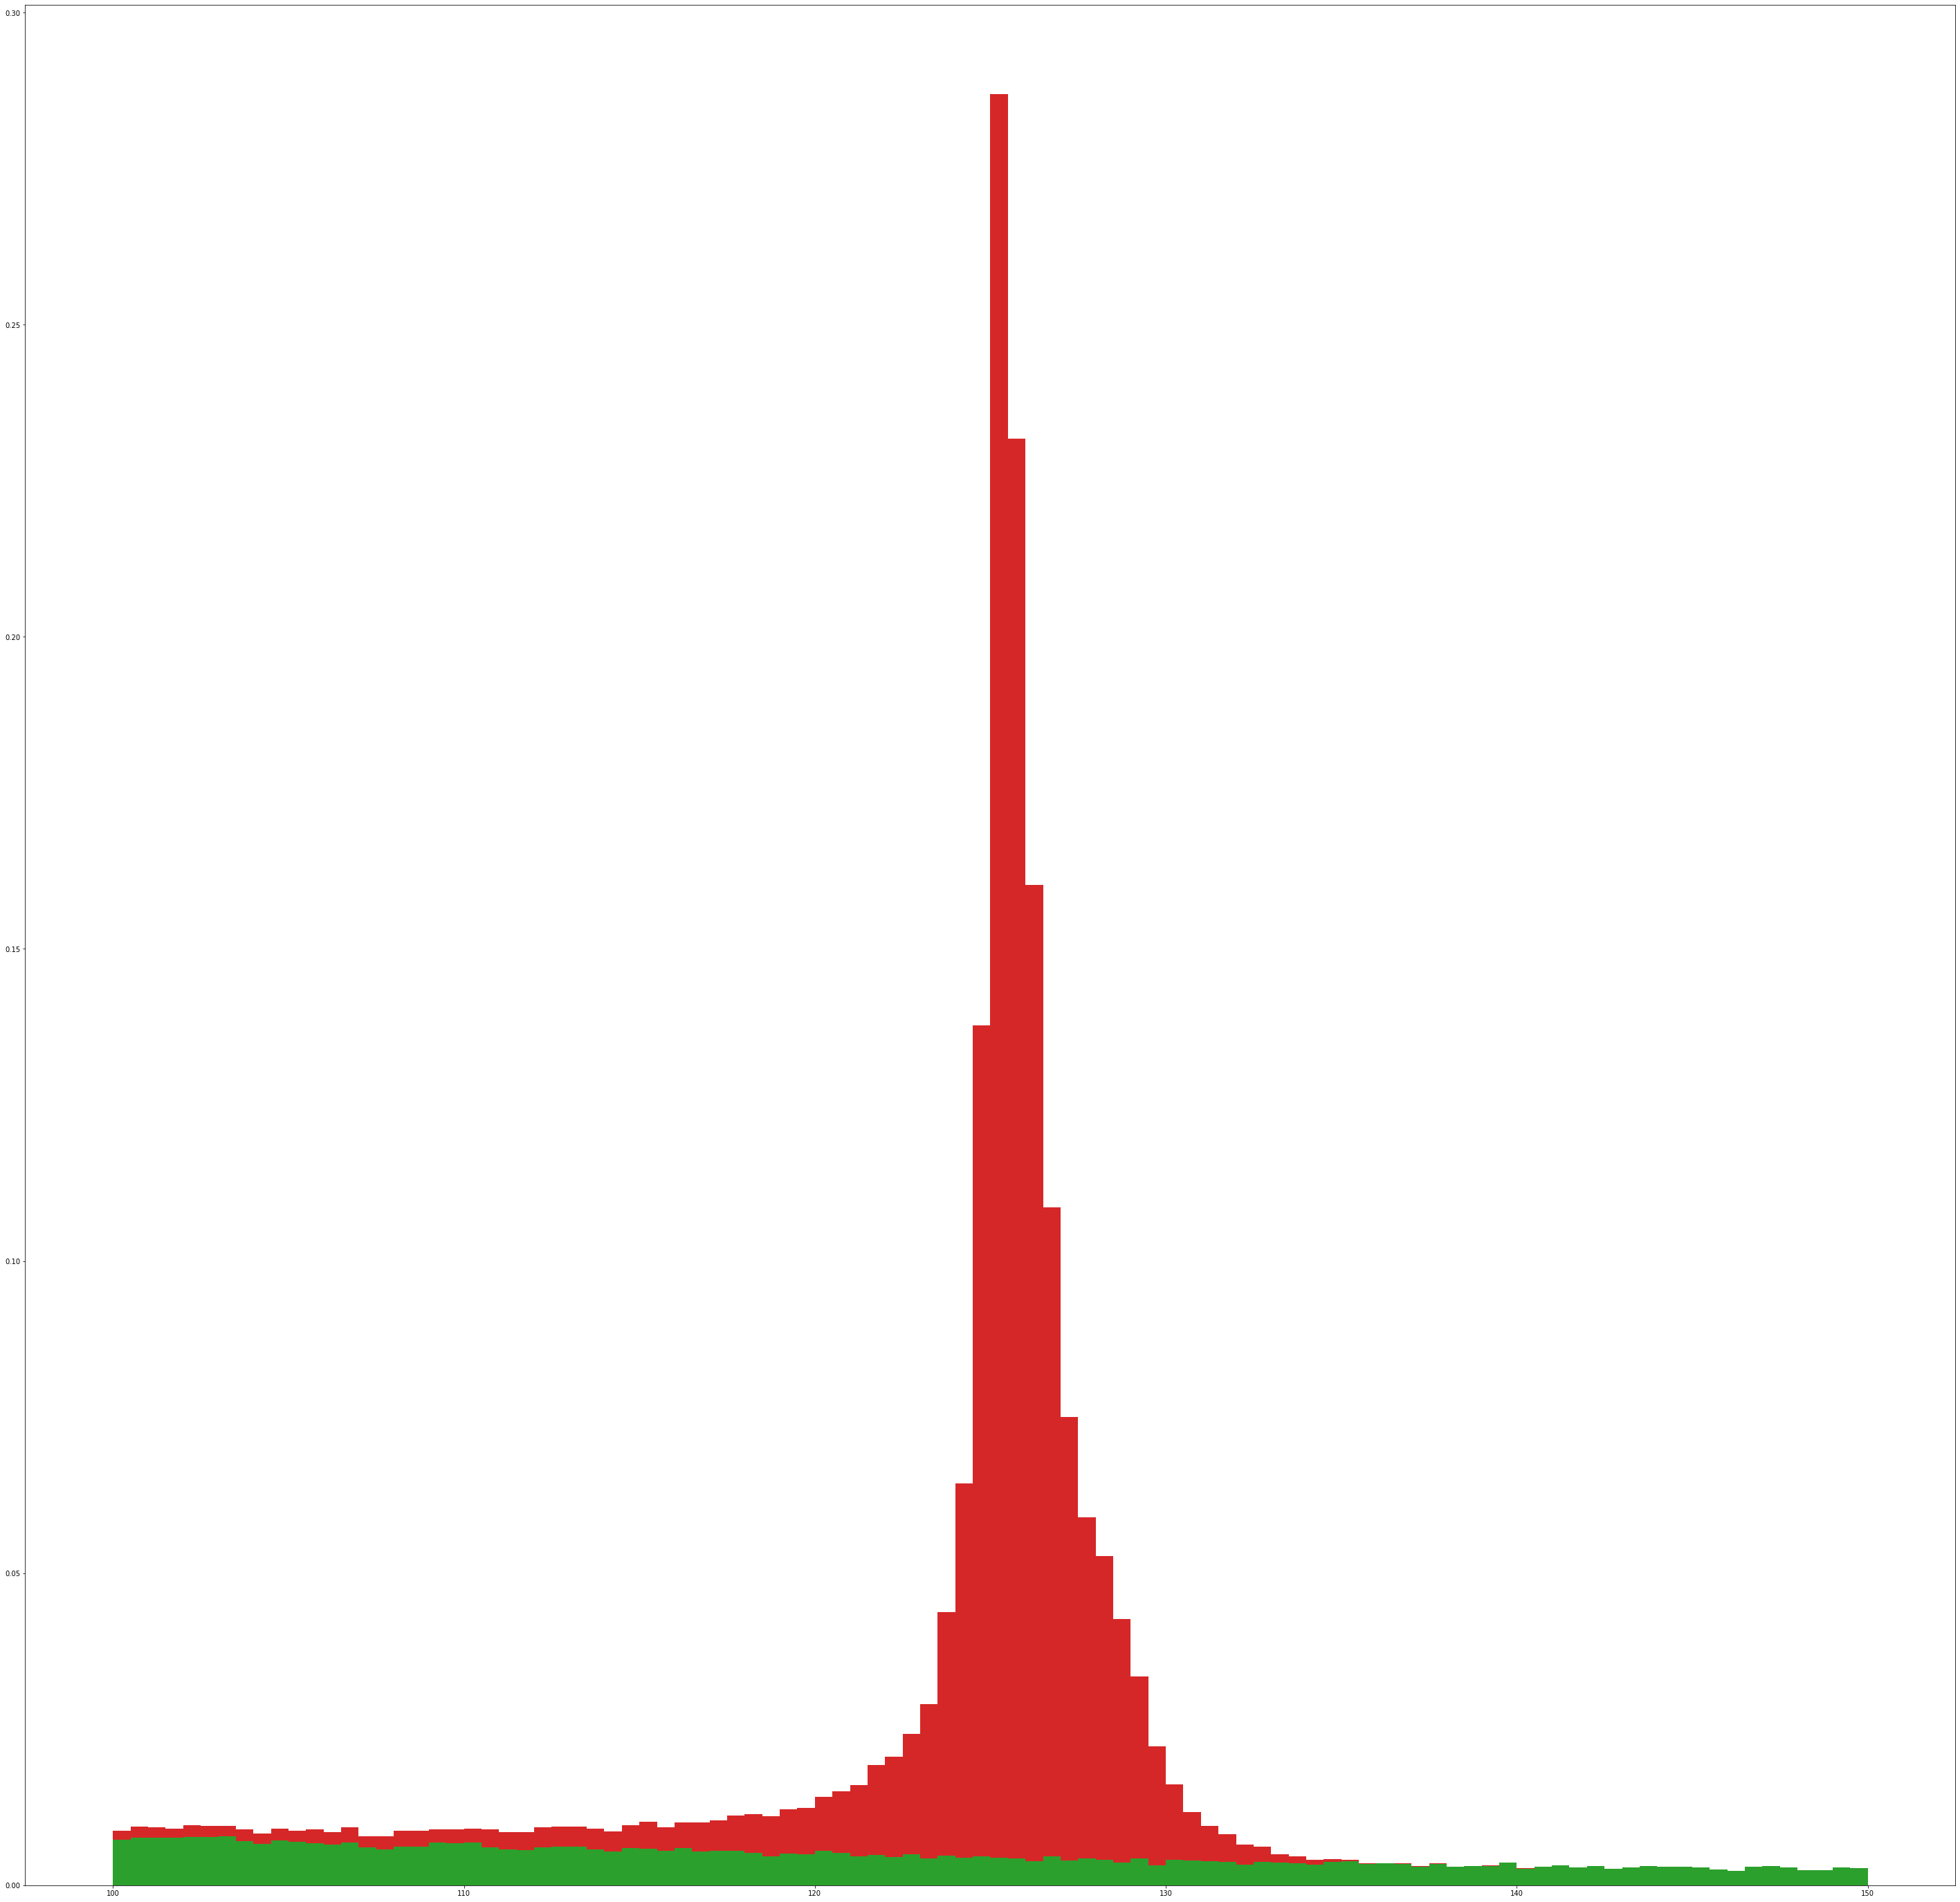

In [45]:
qcd_cut = []
for i in qcd["mass"]:
    if i > 100 and i < 150:
        qcd_cut.append(i)
        
higgs_cut = []
for i in higgs["mass"]:
    if i > 100 and i < 150:
        higgs_cut.append(i)
        
len(qcd_cut)
fig, ax = plt.subplots(1,1)
hist2 = ax.hist([qcd_cut, higgs_cut], density=True, stacked=True, bins=100)
ax.hist([qcd_cut, higgs_cut], density=True, stacked=True, bins=100)

y = 0
z = 0
for i in range(100):
    y = y + hist2[0][0][i] * hist2[1][i]
    z = z + hist2[0][1][i] * hist2[1][i]
print(z/math.sqrt(y))

plt.show()

Findings: Based on the significance (Nhiggs / sqrt(Nqcd)); the number printed above each graph), mass is the best feature (significance 33) and t21 is the second best (significance 18).